
# Trabajo Práctico 2

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [2]:
df = pd.read_csv('./data/pokemon/pokemon.csv')
df.head(10)

abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
3     ['Blaze', 'Solar Power']         0.50           1.0             1.0   
4     ['Blaze', 'Solar Power']         0.50           1.0             1.0   
5     ['Blaze', 'Solar Power']         0.25           1.0             1.0   
6     ['Torrent', 'Rain Dish']         1.00           1.0             1.0   
7     ['Torrent', 'Rain Dish']         1.00           1.0             1.0   
8     ['Torrent', 'Rain Dish']         1.00           1.0             1.0   
9  ['Shield Dust', 'Run Away']         1.00           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   
5               2.0            0.5            0.5           0.5   
6               2.0            1.0            1.0           0.5   
7               2.0            1.0            1.0           0.5   
8               2.0            1.0            1.0           0.5   
9               1.0            1.0            0.5           2.0   

   against_flying  against_ghost  ...  percentage_male  pokedex_number  \
0             2.0            1.0  ...             88.1               1   
1             2.0            1.0  ...             88.1               2   
2             2.0            1.0  ...             88.1               3   
3             1.0            1.0  ...             88.1               4   
4             1.0            1.0  ...             88.1               5   
5             1.0            1.0  ...             88.1               6   
6             1.0            1.0  ...             88.1               7   
7             1.0            1.0  ...             88.1               8   
8             1.0            1.0  ...             88.1               9   
9             2.0            1.0  ...             50.0              10   

   sp_attack  sp_defense  speed  type1   type2  weight_kg  generation  \
0         65          65     45  grass  poison        6.9           1   
1         80          80     60  grass  poison       13.0           1   
2        122         120     80  grass  poison      100.0           1   
3         60          50     65   fire     NaN        8.5           1   
4         80          65     80   fire     NaN       19.0           1   
5        159         115    100   fire  flying       90.5           1   
6         50          64     43  water     NaN        9.0           1   
7         65          80     58  water     NaN       22.5           1   
8        135         115     78  water     NaN       85.5           1   
9         20          20     45    bug     NaN        2.9           1   

   is_legendary  
0             0  
1             0  
2             0  
3             0  
4             0  
5             0  
6             0  
7             0  
8             0  
9             0  

[10 rows x 41 columns]

In [3]:
df_description = pd.read_csv('./data/pokemon/columns.csv')
df_description

column                                        description
0                name                  "The English name of the Pokemon"
1       japanese_name        "The Original Japanese name of the Pokemon"
2      pokedex_number   "The entry number of the Pokemon in the Natio...
3     percentage_male   "The percentage of the species that are male....
4               type1                  "The Primary Type of the Pokemon"
5               type2                "The Secondary Type of the Pokemon"
6      classification   "The Classification of the Pokemon as describ...
7            height_m                  "Height of the Pokemon in metres"
8           weight_kg           "The Weight of the Pokemon in kilograms"
9        capture_rate                      "Capture Rate of the Pokemon"
10       baseeggsteps   "The number of steps required to hatch an egg...
11          abilities   "A stringified list of abilities that the Pok...
12  experience_growth             "The Experience Growth of the Pokemon"
13     base_happiness                    "Base Happiness of the Pokemon"
14          against_?   "Eighteen features that denote the amount of ...
15                 hp                       "The Base HP of the Pokemon"
16             attack                   "The Base Attack of the Pokemon"
17            defense                  "The Base Defense of the Pokemon"
18          sp_attack           "The Base Special Attack of the Pokemon"
19         sp_defense          "The Base Special Defense of the Pokemon"
20              speed                    "The Base Speed of the Pokemon"
21         generation   "The numbered generation which the Pokemon wa...
22       is_legendary             "Denotes if the Pokemon is legendary."

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [4]:
#info from dataset
print(f"Cantidad de filas y columnas: {df.shape}")
print(f"Nombre de columnas: {df.columns}")

Cantidad de filas y columnas: (801, 41)
Nombre de columnas: Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')


In [5]:
#Data type from each columns and non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [35]:
#confirming null values from each columns
df.isnull().sum()

abilities             0
against_bug           0
against_dark          0
against_dragon        0
against_electric      0
against_fairy         0
against_fight         0
against_fire          0
against_flying        0
against_ghost         0
against_grass         0
against_ground        0
against_ice           0
against_normal        0
against_poison        0
against_psychic       0
against_rock          0
against_steel         0
against_water         0
attack                0
base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
classfication         0
defense               0
experience_growth     0
height_m              0
hp                    0
japanese_name         0
name                  0
percentage_male      98
pokedex_number        0
sp_attack             0
sp_defense            0
speed                 0
type1                 0
type2                 0
weight_kg             0
generation            0
is_legendary          0
dtype: int64

In [7]:
#stadistic analisys
df.describe()

against_bug  against_dark  against_dragon  against_electric  \
count   801.000000    801.000000      801.000000        801.000000   
mean      0.996255      1.057116        0.968789          1.073970   
std       0.597248      0.438142        0.353058          0.654962   
min       0.250000      0.250000        0.000000          0.000000   
25%       0.500000      1.000000        1.000000          0.500000   
50%       1.000000      1.000000        1.000000          1.000000   
75%       1.000000      1.000000        1.000000          1.000000   
max       4.000000      4.000000        2.000000          4.000000   

       against_fairy  against_fight  against_fire  against_flying  \
count     801.000000     801.000000    801.000000      801.000000   
mean        1.068976       1.065543      1.135456        1.192884   
std         0.522167       0.717251      0.691853        0.604488   
min         0.250000       0.000000      0.250000        0.250000   
25%         1.000000       0.500000      0.500000        1.000000   
50%         1.000000       1.000000      1.000000        1.000000   
75%         1.000000       1.000000      2.000000        1.000000   
max         4.000000       4.000000      4.000000        4.000000   

       against_ghost  against_grass  ...    height_m          hp  \
count     801.000000     801.000000  ...  781.000000  801.000000   
mean        0.985019       1.034020  ...    1.163892   68.958801   
std         0.558256       0.788896  ...    1.080326   26.576015   
min         0.000000       0.250000  ...    0.100000    1.000000   
25%         1.000000       0.500000  ...    0.600000   50.000000   
50%         1.000000       1.000000  ...    1.000000   65.000000   
75%         1.000000       1.000000  ...    1.500000   80.000000   
max         4.000000       4.000000  ...   14.500000  255.000000   

       percentage_male  pokedex_number   sp_attack  sp_defense       speed  \
count       703.000000      801.000000  801.000000  801.000000  801.000000   
mean         55.155761      401.000000   71.305868   70.911361   66.334582   
std          20.261623      231.373075   32.353826   27.942501   28.907662   
min           0.000000        1.000000   10.000000   20.000000    5.000000   
25%          50.000000      201.000000   45.000000   50.000000   45.000000   
50%          50.000000      401.000000   65.000000   66.000000   65.000000   
75%          50.000000      601.000000   91.000000   90.000000   85.000000   
max         100.000000      801.000000  194.000000  230.000000  180.000000   

        weight_kg  generation  is_legendary  
count  781.000000  801.000000    801.000000  
mean    61.378105    3.690387      0.087391  
std    109.354766    1.930420      0.282583  
min      0.100000    1.000000      0.000000  
25%      9.000000    2.000000      0.000000  
50%     27.300000    4.000000      0.000000  
75%     64.800000    5.000000      0.000000  
max    999.900000    7.000000      1.000000  

[8 rows x 34 columns]

In [8]:
#Distribution for this dataset
sns.pairplot(df)

/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_24521/2095625916.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')


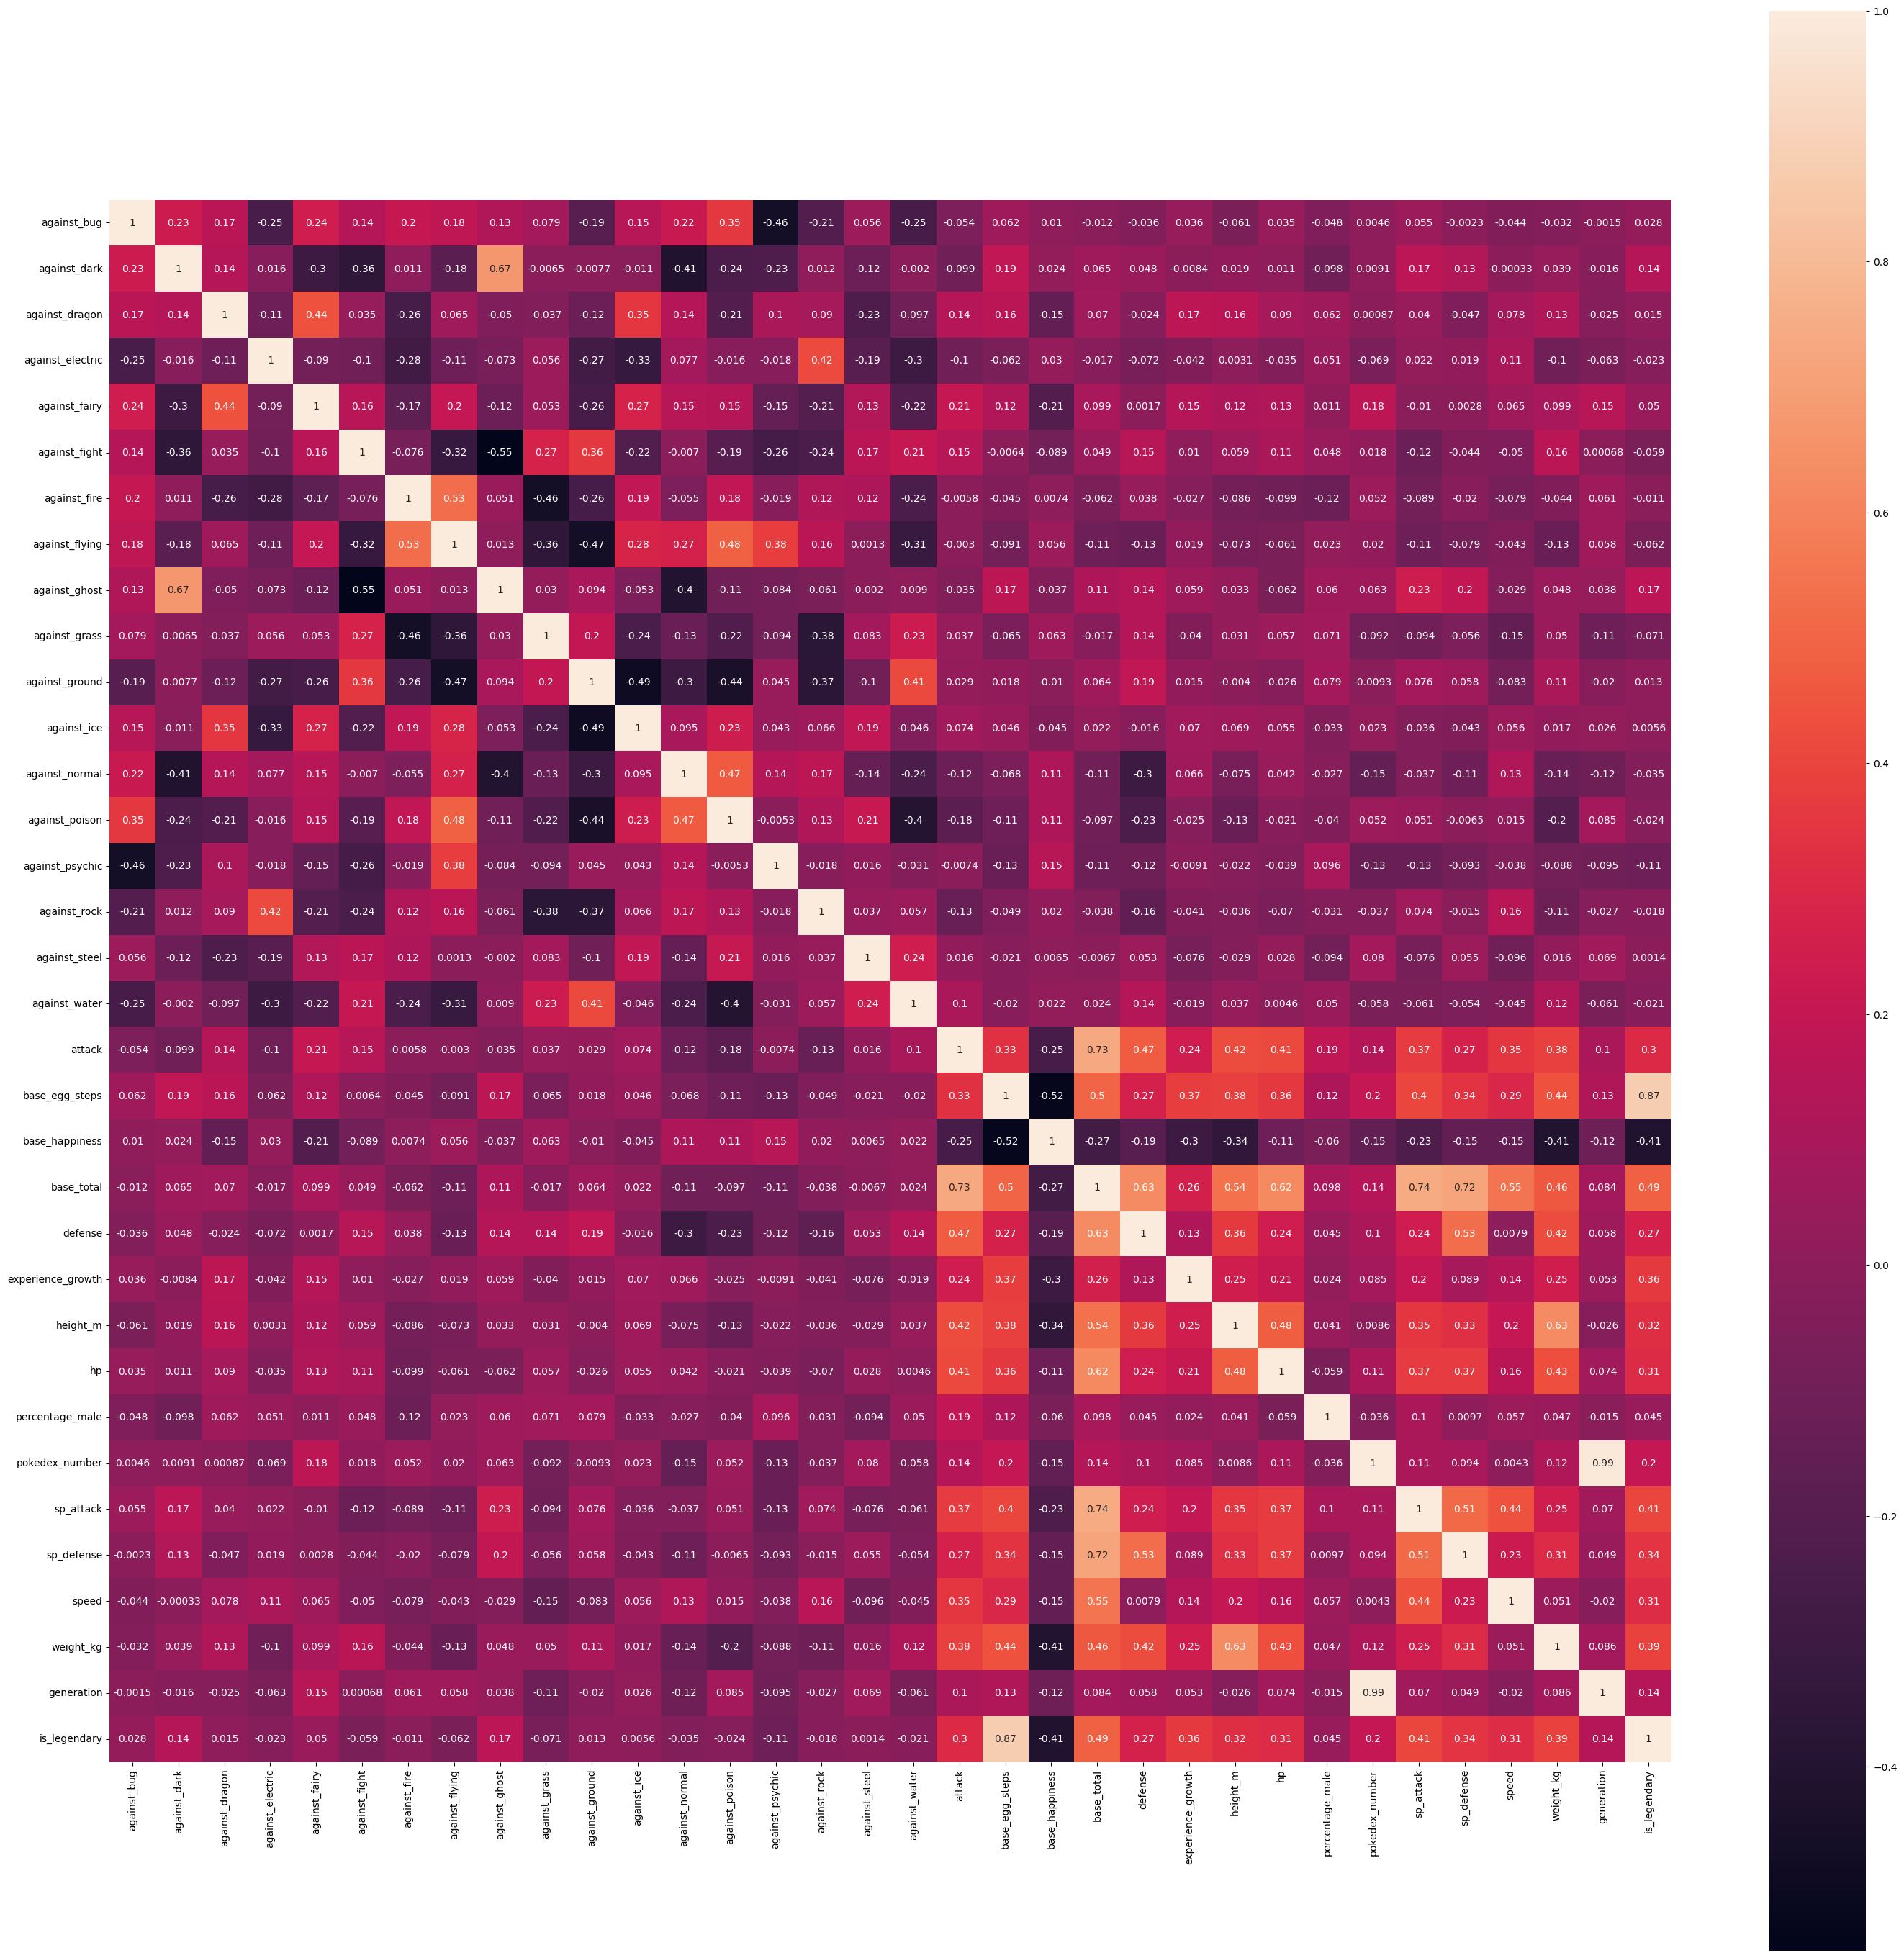

In [9]:
#Correlation between variables
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(35, 35))

corr = df.corr(method='pearson')
sns.heatmap(
    corr,
    square    = True,
    ax        = ax,
    annot=True
)

ax.tick_params(labelsize = 10)

In [ ]:
#sns.pairplot(dataset[['age', 'miles', 'debt', 'income', 'sales']], diag_kind="kde")

### analisis
1. ¿tenemos campos con valores nulos?
* si, tenemos varias columnas con datos nulos, las cuales son:
    * 27 - height_m       -   781 non-null (20 null values) -   float64
    * 31 - percentage_male-   703 non-null (98 null values)  -   float64
    * 37 - type2          -    417 non-null (384 null values)-   object
    * 38 - weight_kg      -    781 non-null (20 null values) -   float64
2. ¿Como se van a tratar los datos nulos?
* Por cada variable se aplicara una tecnica distinta para lidear con los valores nulos:
    * height_m se utilizara la media para representar los valores nulos ya que son poco los valores faltantes.
    * percentage_male se utilizara el valor más frecuente en donde esten los valores nulos, ya que, se tienen muchos valores similares.
    * type2 al ser un string se usara la estrategia de reemplazar los valores nulos con los más frecuentes.
    * weight_kg tambien se utilizara la media ya que son poco los valores faltantes.
3. ¿Como se relacionan?
* Como se puede observar en el cuadro de correlación según el coeficiente de Pearson, las variables que están más relacionadas a la variable que intentamos predecir (is_legendary) son:
    * attack
    * base_egg_steps
    * base_total
    * experience_growth
    * height_m
    * hp
    * sp_attack
    * sp_defence
    * speed
    * weight_kg
4. ¿Cual distribucion siguen los datos?
* Por el histograma armado anteriormente, este conjunto de datos parece seguir distintas distribuciones entre las cuales se encuentran:
    * uniforme
    * Bernoulli (is_legendary la veriable que buscamos predecir sigue esta distribucion)
    * Normal
    * otros



### Preprocesamiento

In [38]:
#filling missing values with the mean
filling_value01 = SimpleImputer(strategy='mean',missing_values=np.nan)
filling_value01 = filling_value01.fit(df[['height_m']])
df[['height_m']] = filling_value01.transform(df[['height_m']])

filling_value02 = SimpleImputer(strategy='mean',missing_values=np.nan)
filling_value02 = filling_value01.fit(df[['weight_kg']])
df[['weight_kg']] = filling_value01.transform(df[['weight_kg']])

df[['height_m', 'weight_kg']].isnull().sum()

height_m     0
weight_kg    0
dtype: int64

In [37]:
#filling missing values with most frequent value
filling_value03 = SimpleImputer(strategy='most_frequent',missing_values=np.nan)
filling_value03 = filling_value03.fit(df[['type2']])
df[['type2']] = filling_value03.transform(df[['type2']])

filling_value04 = SimpleImputer(strategy='most_frequent',missing_values=np.nan)
filling_value04 = filling_value03.fit(df[['percentage_male']])
df[['percentage_male']] = filling_value03.transform(df[['percentage_male']])

df[['type2', 'percentage_male']].isnull().sum()


type2              0
percentage_male    0
dtype: int64

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [10]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor